# Notebook 1:
# Goal: Understanding the data

## Loading in large data sets 

### For large datasets, the following code allows us to extract only a certain amount of rows

In [1]:
#https://thedatafrog.com/en/articles/text-mining-pandas-yelp/
import json
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.width', 10000)

# open input file: 
ifile = open('yelp_academic_dataset_review-001.json', encoding = 'utf-8') 

# read the first 100k entries
# set to -1 to process everything
stop = 200000

all_data = list()
for i, line in enumerate(ifile):
    if i%10000==0:
        print(i)
    if i==stop:
        break    
    # convert the json on this line to a dict
    data = json.loads(line)
    # extract what we want
    text = data['text']
    stars = data['stars']
    user_id = data['user_id']
    business_id= data["business_id"]
    # add to the data collected so far
    all_data.append([stars, text, user_id, business_id])
# create the DataFrame
yelp_reviews = pd.DataFrame(all_data, columns=['stars','text', 'user_id', 'buisness_id'])



0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000


### Which column of text should we use? Tips or the full review?

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# open input file: 
ifile = open('yelp_academic_dataset_user.json', encoding = 'utf-8') 

# read the first 100k entries
# set to -1 to process everything
stop = 200000

all_data = list()
for i, line in enumerate(ifile):
    if i%10000==0:
        print(i)
    if i==stop:
        break    
    # convert the json on this line to a dict
    data = json.loads(line)
    # extract what we want
    user_id= data["user_id"]
    name = data["name"]
    review_count = data["review_count"]
    yelping_since= data["yelping_since"]
    friends = data["friends"]
    fans = data["fans"]
    elite = data["elite"]



    # add to the data collected so far
    all_data.append([user_id, name, review_count, yelping_since, friends, fans, elite])
# create the DataFrame
users= pd.DataFrame(all_data, columns=["user_id", "name", "review_count", "yelping_since", "friends", "fans", "elite"])

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000


In [3]:
buisness_data = pd.read_json('yelp_academic_dataset_business.json', lines =True)

In [4]:
#https://sparkbyexamples.com/pandas/pandas-create-new-dataframe-by-selecting-specific-columns/
buisness_data_for_NLTK= pd.DataFrame().assign(business_id =buisness_data["business_id"], name=buisness_data["name"], is_open=buisness_data["is_open"])
buisness_data_for_NLTK.drop_duplicates()

,business_id,name,is_open
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ",0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,1
2,tUFrWirKiKi_TAnsVWINQQ,Target,0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,1
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,1
...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,1
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,1
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,1
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,1


In [5]:
ifile = open('yelp_academic_dataset_tip.json', encoding = 'utf-8') 

# read the first 100k entries
# set to -1 to process everything
stop = 100000

all_data = list()
for i, line in enumerate(ifile):
    if i%10000==0:
        print(i)
    if i==stop:
        break    
    # convert the json on this line to a dict
    data = json.loads(line)
    # extract what we want
    user_id= data["user_id"]
    business_id = data["business_id"]
    text = data["text"]
    
 


    # add to the data collected so far
    all_data.append([user_id, business_id, text])
# create the DataFrame
tips= pd.DataFrame(all_data, columns=["user_id", "business_id", "text"])

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000


In [ ]:
tips.drop_duplicates()

In [6]:
import pandas as pd

merged_df = pd.merge(tips, buisness_data_for_NLTK, on='business_id')



In [7]:
comparing_tips_with_nltk = merged_df
comparing_tips_with_nltk

,user_id,business_id,text,name,is_open
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,Century 20 El Con and XD,1
1,-PNOT-APcKKu9PFokhCtJA,3uLgwr0qeCNMjKenHJwPGQ,The Dark Knight Rises in XD! I don't know what...,Century 20 El Con and XD,1
2,wzX8UssOglKwSDx8qob8zA,3uLgwr0qeCNMjKenHJwPGQ,Cleanliness matters....I just sat down to watc...,Century 20 El Con and XD,1
3,bQmEEqlobO4J0oasLUTX0Q,3uLgwr0qeCNMjKenHJwPGQ,Early bird gets the worm!,Century 20 El Con and XD,1
4,u2NnaNOcwOVCWDYeGQpoaA,3uLgwr0qeCNMjKenHJwPGQ,Brand new seats!,Century 20 El Con and XD,1
...,...,...,...,...,...
99995,yPdPATvZ95l366Pp8nVzLQ,Bawf-t1gcb4TAxS4NRSqhg,Shad Fest!,Penn Treaty Park,1
99996,3YhG4h4Ok654iVfqdmkuRg,NqqI-GfZiOdgm8ppkKSSzg,"Crazy expensive! $6 for a green onion cake, or...",Lemon Grass Grill,1
99997,vFZUDAxiFZlEQgkV3VSsBA,i3xJ2Qhlpnf2-BVq92-vkw,Absolutely the worst fuel oil / security compa...,Meenan,1
99998,fCvMnJU1Z-XhAjKg99wK3Q,Xwp9dHOS975h0EWmlEC2tw,BEST ENTRANCE:\nEnter through the Rite Aid Ent...,Time After Time,1


In [8]:
#lets look at what creates a successful buisness, what tips do we get?

comparing_tips_with_nltk.text= comparing_tips_with_nltk.text.convert_dtypes(str)
import re
import re
import nltk
from nltk import pos_tag#a must need in order for the rest of the packages to work 
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer #three different type of tokenizers that we may use 
from nltk.corpus import stopwords, wordnet# need
from nltk.stem import WordNetLemmatizer #need

In [9]:
comparing_tips_with_nltk

,user_id,business_id,text,name,is_open
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,Century 20 El Con and XD,1
1,-PNOT-APcKKu9PFokhCtJA,3uLgwr0qeCNMjKenHJwPGQ,The Dark Knight Rises in XD! I don't know what...,Century 20 El Con and XD,1
2,wzX8UssOglKwSDx8qob8zA,3uLgwr0qeCNMjKenHJwPGQ,Cleanliness matters....I just sat down to watc...,Century 20 El Con and XD,1
3,bQmEEqlobO4J0oasLUTX0Q,3uLgwr0qeCNMjKenHJwPGQ,Early bird gets the worm!,Century 20 El Con and XD,1
4,u2NnaNOcwOVCWDYeGQpoaA,3uLgwr0qeCNMjKenHJwPGQ,Brand new seats!,Century 20 El Con and XD,1
...,...,...,...,...,...
99995,yPdPATvZ95l366Pp8nVzLQ,Bawf-t1gcb4TAxS4NRSqhg,Shad Fest!,Penn Treaty Park,1
99996,3YhG4h4Ok654iVfqdmkuRg,NqqI-GfZiOdgm8ppkKSSzg,"Crazy expensive! $6 for a green onion cake, or...",Lemon Grass Grill,1
99997,vFZUDAxiFZlEQgkV3VSsBA,i3xJ2Qhlpnf2-BVq92-vkw,Absolutely the worst fuel oil / security compa...,Meenan,1
99998,fCvMnJU1Z-XhAjKg99wK3Q,Xwp9dHOS975h0EWmlEC2tw,BEST ENTRANCE: Enter through the Rite Aid Entr...,Time After Time,1


In [10]:
#https://github.com/sharmaroshan/Twitter-Sentiment-Analysis/blob/master/LICENSE
#under license provided, this code was supplied by the NLTK library and github owner above
#adjustments made by me are highlighted. 
sw = stopwords.words('english')
sw.extend(['link', 'rt',])
#added all punctuation, made sure # and @ wasnt in there
punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~“!'
twitter_re = re.compile('[#@][a-zA-Z]*')
num_re = re.compile('^\d{1}$')
hashtags = re.compile ("#([a-zA-Z0-9_]{1,50})")

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def txt_clean(txt, stop_words=sw):
    # takes in a string and returns a cleaned up string ready for count or tfidf vectorizing
    
    # splitting the text up into words
    t = txt.split(' ')
    # turning the words lowercase
    t = [w.lower() for w in t]
    # removing punctuation
    t = [w.translate(w.maketrans('','', punctuation)) for w in t]
    # removing @'s and #'s which are twitter jargon
    t = [w for w in t if not twitter_re.match(w)]
    t = [w for w in t if not hashtags.match(w)]

    # removing leftover numbers
    t = [w for w in t if not num_re.match(w)]
    # removing stop words and more twitter jargon
    t = [w for w in t if w not in stop_words]
    # removing empty strings
    t = [w for w in t if w]
    
    # word lemmatizing
    t = pos_tag(t)
    t = [(w[0], get_wordnet_pos(w[1])) for w in t]
    lem = WordNetLemmatizer()
    t = [lem.lemmatize(w[0], w[1]) for w in t]
    # joining all the strings together into one
    return ' '.join(t)

comparing_tips_with_nltk['text_refurbished'] = comparing_tips_with_nltk["text"].map(txt_clean)

In [11]:
#due to memory issues lets save this
#comparing_tips_with_nltk.to_csv('comparing_tips_with_nltk2.csv')

0                                        avenger time lady
1                    dark knight rise xd dont know xd cost
2        cleanliness mattersi sit watch movie popcorn k...
3                                      early bird get worm
4                                           brand new seat
                               ...                        
99995                                            shad fest
99996    crazy expensive green onion cake salad roll sp...
99997    absolutely bad fuel oil security company area ...
99998    best entrance\nenter rite aid entrance jcp nei...
99999         new discovery theyre dogfriendly kidfriendly
Name: text_refurbished, Length: 100000, dtype: object

In [14]:
#get vader sentiment analysis going to cross compare 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def sentiment_scores(sentence):

    #The sentimentintensity analyzer classifier is used to rate the polarity of the sentance from highly negative to highly positive

    sid_obj = SentimentIntensityAnalyzer()
    #obtain sentance and find the score via the polarity_score fx 
    sentiment_dict = sid_obj.polarity_scores(sentence)
    
    #if compound = 0 then it is neutral, -1 = negative, + 1 positive. the value we assign to compound/positive/negative is beyond the scope of this project.
    #if rated at least 5% positive then it is positive and the same for negative, anywhere in between and it's neutral.

    if sentiment_dict['compound'] >= 0.1 :
        return "Positive"
 
    elif sentiment_dict['compound'] <= - 0.1 :
        return "Negative"
 
    else :
        return "Neutral"

In [13]:
comparing_tips_with_nltk['text_refurbished'] = comparing_tips_with_nltk['text_refurbished'].convert_dtypes(str)

In [15]:
comparing_tips_with_nltk['vader_score'] = comparing_tips_with_nltk['text_refurbished'].map(sentiment_scores)

In [16]:
comparing_tips_with_nltk.to_csv('comparing_tips_with_nltkvader.csv')

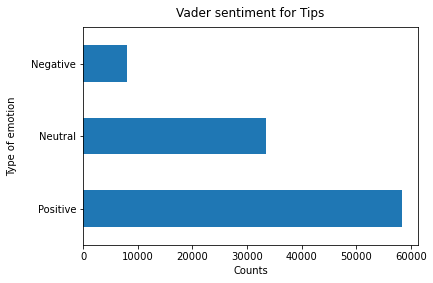

In [18]:
comparing_tips_with_nltk['vader_score'].value_counts().plot(kind = 'barh')
plt.xlabel("Counts")
plt.ylabel("Type of emotion", labelpad=14)
plt.title("Vader sentiment for Tips", y=1.02);

Text(0.5, 1.02, 'Word analysis through Count Vectorization for Tips')

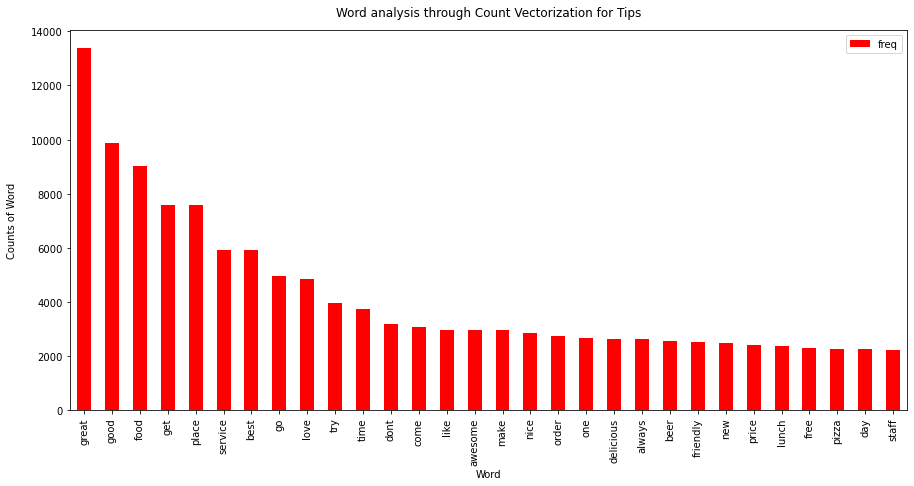

In [20]:
#obtained and adjusted from flatiron
from sklearn.feature_extraction.text import CountVectorizer
#set X to encompass all tweet_text 
X = comparing_tips_with_nltk["text_refurbished"]


#use the CV classifier to pass the column without a tokenizer, preprocessor and set lowercase=False 
cv = CountVectorizer(tokenizer=None,
                             preprocessor=None,
                             lowercase=False)
#creates a sparse matrix
words = cv.fit_transform(X)
#add all the values into a variable called sum_words
sum_words = words.sum(axis=0)

#for every word in cv.vocabulary.items (which returns a list), add it to the unique count
#gives off a list of tuples' (item',count) that resembles a pd
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
#sort by ascending order
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
#create the df
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
#use iloc next time
frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'red')
plt.xlabel("Word")
plt.ylabel("Counts of Word", labelpad=14)
plt.title("Word analysis through Count Vectorization for Tips", y=1.02)


In [ ]:
comparing_tips_with_nltk

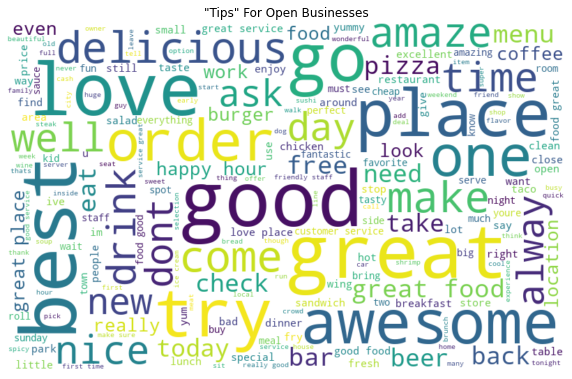

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from wordcloud import WordCloud
a =' '.join([text for text in comparing_tips_with_nltk['text_refurbished'] [comparing_tips_with_nltk['is_open'] == 1]])

wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state = 0, max_font_size = 110).generate(a)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('"Tips" For Open Businesses')
plt.show()


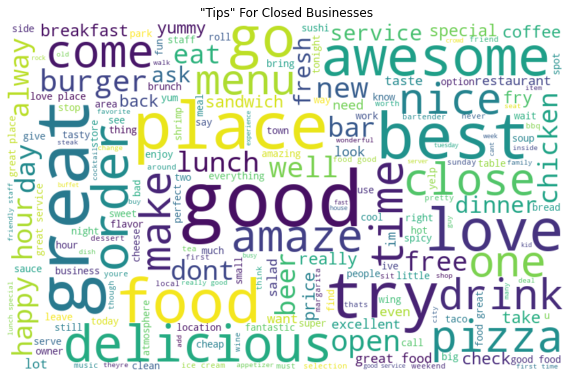

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from wordcloud import WordCloud
b =' '.join([text for text in comparing_tips_with_nltk['text_refurbished'] [comparing_tips_with_nltk['is_open'] == 0]])

wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state = 0, max_font_size = 110).generate(b)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('"Tips" For Closed Businesses')
plt.show()


So this is a comparison between open and closed stores. We are going to need more data so let's do a TTS with TFIDV and find a baseline 

In [23]:

from sklearn.model_selection import train_test_split
X= None
y = None 
X= comparing_tips_with_nltk['text_refurbished']
y= comparing_tips_with_nltk['is_open']
X_t, X_val, y_t, y_val = train_test_split(X, y,
                                          test_size=0.25, random_state=42)

In [24]:
# tuse tfidf vec with ngram range(2,2)
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(ngram_range=(1,2))
X_t = v.fit_transform(X_t)
X_val = v.transform(X_val)

In [25]:
v.vocabulary_

{'always': 12509,
 'check': 48553,
 'yelp': 281404,
 'booth': 34673,
 'really': 203134,
 'cool': 60947,
 'people': 185321,
 'hang': 119441,
 'always check': 12569,
 'check yelp': 49082,
 'yelp booth': 281428,
 'booth really': 34710,
 'really cool': 203201,
 'cool people': 61129,
 'people hang': 185457,
 'love': 149264,
 'attentive': 19746,
 'bartender': 25770,
 'attentive bartender': 19749,
 'doesnt': 75964,
 'accept': 7875,
 'amex': 14160,
 'doesnt accept': 75965,
 'accept amex': 7883,
 'give': 109310,
 'new': 168630,
 'owner': 180417,
 'second': 218730,
 'chance': 47445,
 'bad': 23278,
 'experience': 89698,
 'like': 143002,
 'henry': 122209,
 'go': 110158,
 'last': 139960,
 'night': 170521,
 'food': 97997,
 'great': 114443,
 'soup': 232031,
 'fresh': 101463,
 'hot': 125327,
 'noodle': 171765,
 'crisp': 64732,
 'special': 233164,
 'menu': 158451,
 'service': 221690,
 'staff': 235844,
 'accommodate': 8090,
 'plus': 192935,
 'get': 106637,
 'orange': 177671,
 'fortune': 100032,
 'cooky'

In [143]:
X=None
from sklearn.feature_extraction.text import TfidfVectorizer
X=None
y=None
X= comparing_tips_with_nltk['text_refurbished']
y= comparing_tips_with_nltk['is_open']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    test_size=0.25)



TypeError: train_test_split() got multiple values for argument 'test_size'

In [27]:
token_docs=[txt_clean(doc,sw) for doc in X_train]

In [28]:
X_t, X_val, y_t, y_val = train_test_split(token_docs, y_train,
                                          test_size=0.25, random_state=42)

In [29]:
#this time CV without parameters
cv = CountVectorizer()
X_t_vec = cv.fit_transform(X_t)
X_t_vec  = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(cv.vocabulary_)
X_t_vec.set_index(y_t.index, inplace=True)


X_val_vec = cv.transform(X_val)
X_val_vec  = pd.DataFrame.sparse.from_spmatrix(X_val_vec)
X_val_vec.columns = sorted(cv.vocabulary_)
X_val_vec.set_index(y_val.index, inplace=True)

In [30]:
from collections import defaultdict
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [31]:
mnb = MultinomialNB()
mnb.fit(X_t_vec, y_t)

MultinomialNB()

In [32]:
y_hat = mnb.predict(X_val_vec)
accuracy_score(y_val, y_hat)

0.7221333333333333

In [33]:
precision_score(y_val, y_hat, average='weighted')

0.6471968622989039

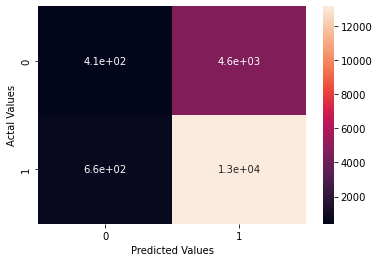

In [34]:
cm = confusion_matrix(y_val, y_hat)
cm_df  =pd.DataFrame(cm, index=[0,1], columns = [0,1])
cm_df
import seaborn as sns
sns.heatmap(cm_df, annot=True)
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

The precision accuracy score is 64%. Therefore based on the words, the reviews do not necessarily correlate directly to the status of the resturant. For instance the amount of times it predicts a resturant to be closed based on previous reviews is more based on luck than actual reviews. 

So the next step is to locate whether or not MNB is a decent output, we can use the same data but with a different predictor (selecting the proper output given the same situation). We will try the random forest alternative 

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
X=None
y=None
X= comparing_tips_with_nltk['text_refurbished']
y= comparing_tips_with_nltk['is_open']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    test_size=0.25)


In [ ]:
#token_docs=[txt_clean(doc,sw) for doc in X_train]
#token docs already defined

In [37]:
X_t, X_val, y_t, y_val = train_test_split(token_docs, y_train,
                                          test_size=0.25, random_state=42)

In [38]:
#this time CV without parameters
cv = CountVectorizer()
X_t_vec = cv.fit_transform(X_t)
X_t_vec  = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(cv.vocabulary_)
X_t_vec.set_index(y_t.index, inplace=True)


X_val_vec = cv.transform(X_val)
X_val_vec  = pd.DataFrame.sparse.from_spmatrix(X_val_vec)
X_val_vec.columns = sorted(cv.vocabulary_)
X_val_vec.set_index(y_val.index, inplace=True)

In [39]:
rf = RandomForestClassifier()
rf.fit(X_t_vec, y_t)

RandomForestClassifier()

In [40]:
y_pred=rf.predict(X_val_vec)

In [41]:
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import f1_score
print(f1_score(y_val, y_pred, average='micro'))

0.7058666666666666


In [42]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5195532450277615

## Based off of these two models, count vectorization for NLTK is preferred and the evaluation method for the first possible target varialbe "is_open" is "good"
We will continue to the next possible dependent variable; stars

In [43]:
business_eda = pd.read_json('yelp_academic_dataset_business.json', lines =True)
business_eda1 = pd.json_normalize(business_eda['attributes'])

buisness_eda3 = pd.json_normalize(business_eda['hours'])



In [51]:
business_eda1.shape

(150346, 39)

In [58]:
#dont run this till tomorrow
business_eda_norm = pd.read_json('yelp_academic_dataset_business.json', lines =True)
business_eda_final= pd.concat([business_eda_norm, business_eda1], axis=1)

business_eda_final= pd.concat([business_eda_final, buisness_eda3], axis =1)

In [59]:
business_eda_final.shape

(150346, 60)

In [60]:
business_eda_final

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,RestaurantsCounterService,AgesAllowed,DietaryRestrictions,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,0:0-0:0,8:0-18:30,8:0-18:30,8:0-18:30,8:0-18:30,8:0-14:0,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,8:0-22:0,8:0-22:0,8:0-22:0,8:0-22:0,8:0-23:0,8:0-23:0,8:0-22:0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,7:0-20:0,7:0-20:0,7:0-20:0,7:0-20:0,7:0-21:0,7:0-21:0,7:0-21:0
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,14:0-22:0,16:0-22:0,12:0-22:0,12:0-22:0,12:0-18:0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,AB,T6J 5H2,53.468419,-113.492054,3.0,13,...,NaN,NaN,NaN,10:0-19:30,10:0-19:30,10:0-19:30,10:0-19:30,10:0-19:30,10:0-17:30,11:0-17:0
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,TN,37204,36.115118,-86.766925,4.0,5,...,NaN,NaN,NaN,9:30-17:30,9:30-17:30,9:30-17:30,9:30-17:30,9:30-17:30,9:0-17:0,0:0-16:0
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,IN,46250,39.908707,-86.065088,3.5,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,...,NaN,NaN,NaN,9:0-20:0,9:0-20:0,9:0-20:0,9:0-20:0,9:0-20:0,9:0-17:0,10:0-17:0


In [ ]:
#Make some adjustments to this graph after MVP to represent kernel density and distribution

In [ ]:
#lets find the correlation and the variance explained by using simple linear regression
# for instance we would expect stars to be 

In [65]:

import json
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.width', 10000)

# open input file: 
ifile = open('yelp_academic_dataset_review-001.json', encoding = 'utf-8') 

# read the first 100k entries
# set to -1 to process everything
stop = 200000

all_data = list()
for i, line in enumerate(ifile):
    if i%10000==0:
        print(i)
    if i==stop:
        break    
    # convert the json on this line to a dict
    data = json.loads(line)
    # extract what we want
    text = data['text']
    stars = data['stars']
    user_id = data['user_id']
    business_id= data["business_id"]
    # add to the data collected so far
    all_data.append([stars, text, user_id, business_id])
# create the DataFrame
yelp_reviews2 = pd.DataFrame(all_data, columns=['stars','text', 'user_id', 'buisness_id'])

# df.to_hdf('

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000


In [66]:
yelp_reviews2

,stars,text,user_id,buisness_id
0,3.0,"If you decide to eat here, just be aware it is...",mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw
1,5.0,I've taken a lot of spin classes over the year...,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ
2,3.0,Family diner. Had the buffet. Eclectic assortm...,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A
3,5.0,"Wow! Yummy, different, delicious. Our favo...",_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA
4,4.0,Cute interior and owner (?) gave us tour of up...,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ
...,...,...,...,...
199995,5.0,Oakley's Bistro is a hidden gem for Indianapol...,uakTslg3Ay3C0816-5yNdQ,idf-eiurCrbsLRcH7c9zmw
199996,5.0,"Let me just say, I'm glad my husband and I dec...",_fMw99otXOCu-Kzc-loMZA,v72HalBu5fQIFTD-oqhSgQ
199997,5.0,I was coming back from the Farmers market toda...,ZfG1T_noQnbOdXnz4USs0Q,cvHY1RTAPSoH94ysP2_eyQ
199998,5.0,Absolutely perfect meal for me. The food is cl...,I0MMq4iYjDjERnSjp76HDw,cBp1fn2LXpSHe4VbTXLYEw


In [67]:
import re
import re
import nltk
from nltk import pos_tag#a must need in order for the rest of the packages to work 
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer #three different type of tokenizers that we may use 
from nltk.corpus import stopwords, wordnet# need
from nltk.stem import WordNetLemmatizer #need

In [68]:
#https://github.com/sharmaroshan/Twitter-Sentiment-Analysis/blob/master/LICENSE
#under license provided, this code was supplied by the NLTK library and github owner above
#adjustments made by me are highlighted. 
sw = stopwords.words('english')

#what other stop wards can be used to that is not representative
sw.extend(['link', 'rt',])
#added all punctuation, made sure # and @ wasnt in there
punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~“!'
twitter_re = re.compile('[#@][a-zA-Z]*')
num_re = re.compile('^\d{1}$')
hashtags = re.compile ("#([a-zA-Z0-9_]{1,50})")

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def txt_clean(txt, stop_words=sw):
    # takes in a string and returns a cleaned up string ready for count or tfidf vectorizing
    
    # splitting the text up into words
    t = txt.split(' ')
    # turning the words lowercase
    t = [w.lower() for w in t]
    # removing punctuation
    t = [w.translate(w.maketrans('','', punctuation)) for w in t]
    # removing @'s and #'s which are twitter jargon
    t = [w for w in t if not twitter_re.match(w)]
    t = [w for w in t if not hashtags.match(w)]

    # removing leftover numbers
    t = [w for w in t if not num_re.match(w)]
    # removing stop words and more twitter jargon
    t = [w for w in t if w not in stop_words]
    # removing empty strings
    t = [w for w in t if w]
    
    # word lemmatizing
    t = pos_tag(t)
    t = [(w[0], get_wordnet_pos(w[1])) for w in t]
    lem = WordNetLemmatizer()
    t = [lem.lemmatize(w[0], w[1]) for w in t]
    # joining all the strings together into one
    return ' '.join(t)

yelp_reviews2['text_refurbished'] = yelp_reviews2["text"].map(txt_clean)

In [69]:
yelp_reviews2.to_csv('Notebook1_yelp_text_ref.csv')

In [70]:
import pandas as pd
yelp_reviews2 = pd.read_csv('Notebook1_yelp_text_ref.csv')

In [82]:
yelp_reviews2['text_refurbished'] = yelp_reviews2['text_refurbished'].convert_dtypes(str)

C:\Users\Gamer\AppData\Local\Temp/ipykernel_21244/246971553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp_reviews2['text_refurbished'] = yelp_reviews2['text_refurbished'].convert_dtypes(str)


In [80]:
yelp_reviews2 = yelp_reviews2.dropna(subset=['text_refurbished'])

In [81]:
yelp_reviews2['text_refurbished'].isna().value_counts()

False    199999
Name: text_refurbished, dtype: int64

In [83]:
yelp_reviews2['vader_score'] = yelp_reviews2['text_refurbished'].map(sentiment_scores)

C:\Users\Gamer\AppData\Local\Temp/ipykernel_21244/425038697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp_reviews2['vader_score'] = yelp_reviews2['text_refurbished'].map(sentiment_scores)


In [84]:
yelp_reviews2.to_csv('full_text_with_nltkvader.csv')

In [85]:
yelp_reviews2 

,Unnamed: 0,stars,text,user_id,buisness_id,text_refurbished,vader_score
0,0,3.0,"If you decide to eat here, just be aware it is...",mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,decide eat aware go take hour begin end try mu...,Positive
1,1,5.0,I've taken a lot of spin classes over the year...,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,ive take lot spin class year nothing compare c...,Positive
2,2,3.0,Family diner. Had the buffet. Eclectic assortm...,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,family diner buffet eclectic assortment large ...,Positive
3,3,5.0,"Wow! Yummy, different, delicious. Our favo...",_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,wow yummy different delicious favorite lamb cu...,Positive
4,4,4.0,Cute interior and owner (?) gave us tour of up...,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,cute interior owner give u tour upcoming patio...,Positive
...,...,...,...,...,...,...,...
199995,199995,5.0,Oakley's Bistro is a hidden gem for Indianapol...,uakTslg3Ay3C0816-5yNdQ,idf-eiurCrbsLRcH7c9zmw,oakley bistro hidden gem indianapolis chef ama...,Positive
199996,199996,5.0,"Let me just say, I'm glad my husband and I dec...",_fMw99otXOCu-Kzc-loMZA,v72HalBu5fQIFTD-oqhSgQ,let say im glad husband decide wait 20 minute ...,Positive
199997,199997,5.0,I was coming back from the Farmers market toda...,ZfG1T_noQnbOdXnz4USs0Q,cvHY1RTAPSoH94ysP2_eyQ,come back farmer market today decide stop turn...,Positive
199998,199998,5.0,Absolutely perfect meal for me. The food is cl...,I0MMq4iYjDjERnSjp76HDw,cBp1fn2LXpSHe4VbTXLYEw,absolutely perfect meal food clean good qualit...,Positive


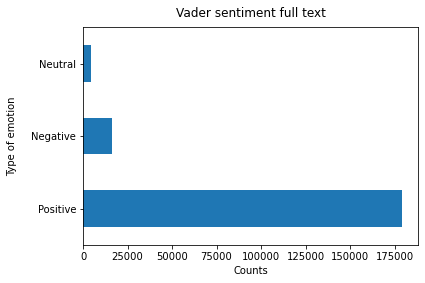

In [89]:
yelp_reviews2['vader_score'].value_counts().plot(kind = 'barh')
plt.xlabel("Counts")
plt.ylabel("Type of emotion", labelpad=14)
plt.title("Vader sentiment full text", y=1.02);

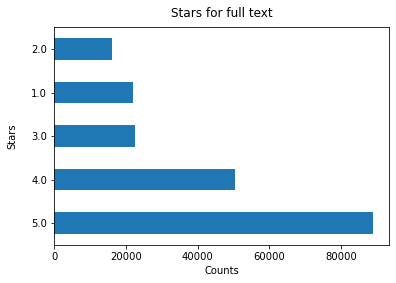

In [88]:
yelp_reviews2['stars'].value_counts().plot(kind = 'barh')
plt.xlabel("Counts")
plt.ylabel("Stars", labelpad=14)
plt.title("Stars for full text", y=1.02);

In [ ]:
yelp_reviews2


Text(0.5, 1.02, 'Word analysis through Count Vectorization')

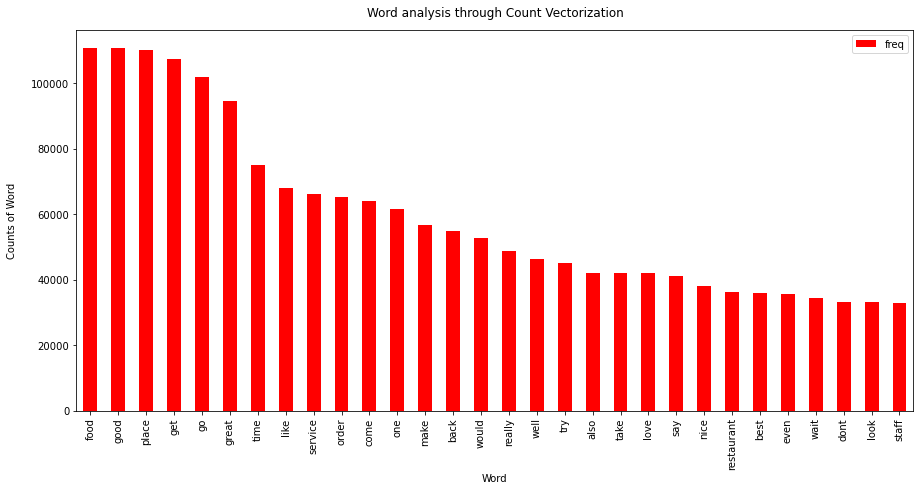

In [90]:
#obtained and adjusted from flatiron
from sklearn.feature_extraction.text import CountVectorizer
#set X to encompass all tweet_text 
X = yelp_reviews2["text_refurbished"]


#use the CV classifier to pass the column without a tokenizer, preprocessor and set lowercase=False 
cv = CountVectorizer(tokenizer=None,
                             preprocessor=None,
                             lowercase=False)
#creates a sparse matrix
words = cv.fit_transform(X)
#add all the values into a variable called sum_words
sum_words = words.sum(axis=0)

#for every word in cv.vocabulary.items (which returns a list), add it to the unique count
#gives off a list of tuples' (item',count) that resembles a pd
words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
#sort by ascending order
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
#create the df
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
#use iloc next time
frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'red')
plt.xlabel("Word")
plt.ylabel("Counts of Word", labelpad=14)
plt.title("Word analysis through Count Vectorization", y=1.02)


In [91]:
yelp_reviews2['stars']= yelp_reviews2['stars'].astype(int)

C:\Users\Gamer\AppData\Local\Temp/ipykernel_21244/2105421117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp_reviews2['stars']= yelp_reviews2['stars'].astype(int)


In [92]:
yelp_reviews2['stars'].isna().sum()

0

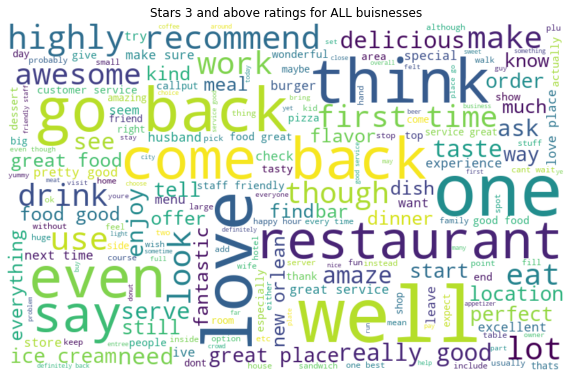

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from wordcloud import WordCloud
stars3andabove =' '.join([text for text in yelp_reviews2['text_refurbished'] [yelp_reviews2['stars'] >= 3]])

wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state = 0, max_font_size = 110).generate(stars3andabove)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Stars 3 and above ratings for ALL buisnesses')
plt.show()


Okay this is very good. we see that people that want to come back usually leave good reviews, however we need some more statistical analaysis on which words to focus.
There seems to be a lot more emotion when it comes to these positive reviews, but lets look at the negative ones 

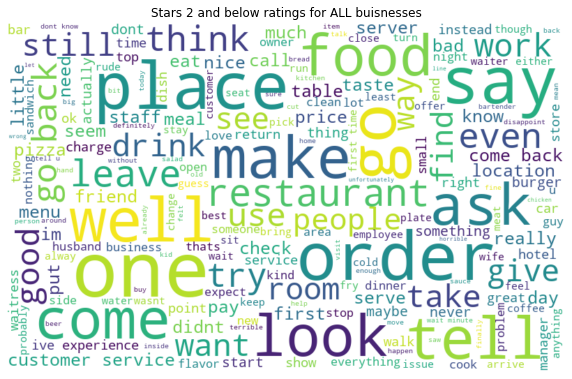

In [94]:
stars2andbelow =' '.join([text for text in yelp_reviews2['text_refurbished'] [yelp_reviews2['stars'] <= 2]])

wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state = 0, max_font_size = 110).generate(stars2andbelow)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Stars 2 and below ratings for ALL buisnesses')
plt.show()

Observations: we see that there are much less specific words that make sense across all buisnsseses and it makes sense because you dont want to ever go back to a poor establishment. However, some keywords here standout that the resturants can improve on. For instance, the "food" may be great but the "server" and "service" might be poor. There is no correlation to examine at this current point but just something to keep in mind. 

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
X=None
y=None
X= yelp_reviews2['text_refurbished']
y= yelp_reviews2['stars']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    test_size=0.25)


In [96]:
token_docs2=[txt_clean(doc,sw) for doc in X_train]

In [97]:
X_t, X_val, y_t, y_val = train_test_split(token_docs2, y_train,
                                          test_size=0.25, random_state=42)

In [98]:
cv = CountVectorizer()
X_t_vec = cv.fit_transform(X_t)
X_t_vec  = pd.DataFrame.sparse.from_spmatrix(X_t_vec)
X_t_vec.columns = sorted(cv.vocabulary_)
X_t_vec.set_index(y_t.index, inplace=True)


X_val_vec = cv.transform(X_val)
X_val_vec  = pd.DataFrame.sparse.from_spmatrix(X_val_vec)
X_val_vec.columns = sorted(cv.vocabulary_)
X_val_vec.set_index(y_val.index, inplace=True)

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_t_vec, y_t)

RandomForestClassifier()

In [100]:
y_pred=rf.predict(X_val_vec)

In [101]:
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import f1_score
print(accuracy_score(y_val, y_pred))

0.55792


In [102]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
X=None
y=None
X= yelp_reviews2['text_refurbished']
y= yelp_reviews2['stars']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=42,
                                                    test_size=0.25)


In [103]:
X_t, X_val, y_t, y_val = train_test_split(token_docs2, y_train,
                                          test_size=0.25, random_state=42)

In [104]:
from collections import defaultdict
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [105]:
mnb = MultinomialNB()
mnb.fit(X_t_vec, y_t)

MultinomialNB()

In [106]:
y_hat = mnb.predict(X_val_vec)
accuracy_score(y_val, y_hat)

0.60472

In [107]:
precision_score(y_val, y_hat, average='weighted')

0.5935915905259642

We see again that the MNB method outperforms RF by both time and effiency.

In [ ]:
yelp_reviews2

# Finding PA resturants

In [108]:
business_eda = None
business_eda1 = None
buisness_eda3 = None 

In [109]:
import pandas as pd
business_eda = pd.read_json('yelp_academic_dataset_business.json', lines =True)
business_eda1 = pd.json_normalize(business_eda['attributes'])

buisness_eda3 = pd.json_normalize(business_eda['hours'])

In [110]:
result = pd.concat([business_eda, business_eda1], axis=1,)

In [111]:
business_data = pd.concat([result, buisness_eda3], axis =1)

In [112]:
business_data['categories'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 150346 entries, 0 to 150345
Series name: categories
Non-Null Count   Dtype 
--------------   ----- 
150243 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [113]:
business_data['categories']
business_data = business_data.drop('categories', axis=1).join(business_data['categories'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('establishment_type'))

In [114]:
business_data['establishment_type'] = business_data['establishment_type'].astype('str')

In [115]:
list_establishments= business_data['establishment_type'].value_counts().index.tolist()


In [116]:
list_establishments

[' Restaurants',
 ' Food',
 ' Shopping',
 'Restaurants',
 ' Home Services',
 ' Nightlife',
 ' Beauty & Spas',
 ' Bars',
 ' Health & Medical',
 ' Local Services',
 ' Event Planning & Services',
 ' Automotive',
 'Food',
 ' Sandwiches',
 ' American (Traditional)',
 ' Active Life',
 'Shopping',
 ' Coffee & Tea',
 ' Breakfast & Brunch',
 ' Fast Food',
 ' Pizza',
 ' American (New)',
 ' Home & Garden',
 ' Fashion',
 ' Burgers',
 'Beauty & Spas',
 ' Hotels & Travel',
 ' Arts & Entertainment',
 ' Auto Repair',
 'Home Services',
 ' Hair Salons',
 ' Specialty Food',
 'Automotive',
 ' Italian',
 ' Mexican',
 ' Nail Salons',
 'Health & Medical',
 ' Doctors',
 ' Seafood',
 ' Hair Removal',
 ' Fitness & Instruction',
 'Local Services',
 ' Professional Services',
 ' Pets',
 ' Real Estate',
 ' Desserts',
 ' Salad',
 ' Bakeries',
 ' Wine & Spirits',
 ' Chicken Wings',
 ' Grocery',
 'Nightlife',
 ' Cafes',
 ' Caterers',
 ' Hotels',
 ' Venues & Event Spaces',
 ' Skin Care',
 ' Chinese',
 'Event Planning &

In [117]:
import re 

In [118]:
business_dataprep = business_data[business_data['establishment_type'].str.contains('.*Restaurants.*')| business_data['establishment_type'].str.contains('.*Food.*')]

In [119]:
buisness_data_prep = business_dataprep.drop_duplicates(subset=['business_id'], ignore_index= True)

In [120]:
buisness_data_prep

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,AgesAllowed,DietaryRestrictions,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,establishment_type
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,7:0-20:0,7:0-20:0,7:0-20:0,7:0-20:0,7:0-21:0,7:0-21:0,7:0-21:0,Restaurants
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,14:0-22:0,16:0-22:0,12:0-22:0,12:0-22:0,12:0-18:0,Food
2,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,...,NaN,NaN,0:0-0:0,6:0-22:0,6:0-22:0,6:0-22:0,9:0-0:0,9:0-22:0,8:0-22:0,Fast Food
3,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Restaurants
4,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,...,NaN,NaN,0:0-0:0,6:0-21:0,6:0-21:0,6:0-16:0,6:0-16:0,6:0-17:0,6:0-21:0,Fast Food
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64611,cM6V90ExQD6KMSU3rRB5ZA,Dutch Bros Coffee,1181 N Milwaukee St,Boise,ID,83704,43.615401,-116.284689,4.0,33,...,NaN,NaN,0:0-0:0,0:0-17:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,Restaurants
64612,1jx1sfgjgVg0nM6n3p0xWA,Savaya Coffee Market,11177 N Oracle Rd,Oro Valley,AZ,85737,32.409552,-110.943073,4.5,41,...,NaN,NaN,0:0-0:0,6:0-14:0,6:0-14:0,6:0-14:0,6:0-14:0,6:0-15:0,6:0-15:0,Specialty Food
64613,WnT9NIzQgLlILjPT0kEcsQ,Adelita Taqueria & Restaurant,1108 S 9th St,Philadelphia,PA,19147,39.935982,-75.158665,4.5,35,...,NaN,NaN,11:0-22:0,11:0-22:0,NaN,11:0-22:0,11:0-2:0,11:0-2:0,11:0-22:0,Restaurants
64614,2O2K6SXPWv56amqxCECd4w,The Plum Pit,4405 Pennell Rd,Aston,DE,19014,39.856185,-75.427725,4.5,14,...,NaN,NaN,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,Restaurants


<AxesSubplot:>

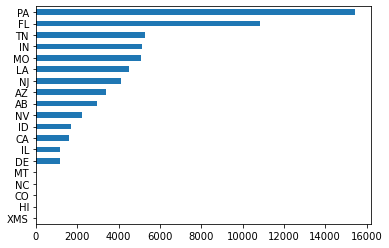

In [121]:
buisness_data_prep.state.value_counts(ascending=True).plot(kind = "barh")

In [122]:
buisness_data_prep.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'attributes', 'hours', 'ByAppointmentOnly', 'BusinessAcceptsCreditCards', 'BikeParking', 'RestaurantsPriceRange2', 'CoatCheck', 'RestaurantsTakeOut', 'RestaurantsDelivery', 'Caters', 'WiFi', 'BusinessParking', 'WheelchairAccessible', 'HappyHour', 'OutdoorSeating', 'HasTV', 'RestaurantsReservations', 'DogsAllowed', 'Alcohol', 'GoodForKids', 'RestaurantsAttire', 'Ambience', 'RestaurantsTableService', 'RestaurantsGoodForGroups', 'DriveThru', 'NoiseLevel', 'GoodForMeal', 'BusinessAcceptsBitcoin', 'Smoking', 'Music', 'GoodForDancing', 'AcceptsInsurance', 'BestNights', 'BYOB', 'Corkage', 'BYOBCorkage', 'HairSpecializesIn', 'Open24Hours', 'RestaurantsCounterService', 'AgesAllowed', 'DietaryRestrictions', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'establishment_type'], dtype='object')

## Level up: GeoJson file for distance

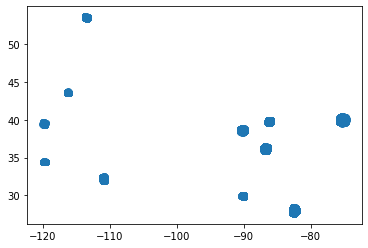

In [123]:
import matplotlib.pyplot as plt
plt.scatter(x=buisness_data_prep['longitude'], y=buisness_data_prep['latitude'])
plt.show()

## Level up: Collaborative filtering for unsupervised learning for star aggregation

In [124]:
work_please= yelp_reviews2[["stars", "user_id", "buisness_id"]]
work_please

,stars,user_id,buisness_id
0,3,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw
1,5,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ
2,3,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A
3,5,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA
4,4,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ
...,...,...,...
199995,5,uakTslg3Ay3C0816-5yNdQ,idf-eiurCrbsLRcH7c9zmw
199996,5,_fMw99otXOCu-Kzc-loMZA,v72HalBu5fQIFTD-oqhSgQ
199997,5,ZfG1T_noQnbOdXnz4USs0Q,cvHY1RTAPSoH94ysP2_eyQ
199998,5,I0MMq4iYjDjERnSjp76HDw,cBp1fn2LXpSHe4VbTXLYEw


In [125]:
from surprise import Reader, Dataset
from sklearn.preprocessing import LabelEncoder


encoder_business_id = LabelEncoder()
encoder_user_id = LabelEncoder()

# Fit the encoders on the business_id and user_id columns
work_please['business_id_encoded'] = encoder_business_id.fit_transform(work_please['buisness_id'])
work_please['user_id_encoded'] = encoder_user_id.fit_transform(work_please['user_id'])


C:\Users\Gamer\AppData\Local\Temp/ipykernel_21244/3237484205.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_please['business_id_encoded'] = encoder_business_id.fit_transform(work_please['buisness_id'])
C:\Users\Gamer\AppData\Local\Temp/ipykernel_21244/3237484205.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_please['user_id_encoded'] = encoder_user_id.fit_transform(work_please['user_id'])


In [126]:
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split
from surprise import SVD
# Create a reader object to read in the data
reader = Reader(rating_scale=(1, 5))

# Use the Dataset class from the surprise library to load the data
data = Dataset.load_from_df(work_please[['user_id_encoded', 'business_id_encoded', 'stars']], reader)

# Split the data into training and test sets
train_data, test_data = train_test_split(data, test_size=0.2)

# Create an instance of the SVD algorithm
algo = SVD()

# Train the model on the training data
algo.fit(train_data)

# Use the trained model to make predictions on the test data
predictions = algo.test(test_data)

# Compute the RMSE of the predictions
from surprise.accuracy import rmse
print(rmse(predictions))


RMSE: 1.2381
1.2380879755472443


In [127]:
predictions

[Prediction(uid=39886, iid=8289, r_ui=5.0, est=3.3768775271720717, details={'was_impossible': False}),
 Prediction(uid=39196, iid=7468, r_ui=5.0, est=4.488665568122839, details={'was_impossible': False}),
 Prediction(uid=69231, iid=6592, r_ui=4.0, est=3.95911076419557, details={'was_impossible': False}),
 Prediction(uid=2671, iid=3715, r_ui=5.0, est=3.865218284843738, details={'was_impossible': False}),
 Prediction(uid=43614, iid=9333, r_ui=4.0, est=3.5761949084332194, details={'was_impossible': False}),
 Prediction(uid=114699, iid=4600, r_ui=4.0, est=3.733557307881061, details={'was_impossible': False}),
 Prediction(uid=113344, iid=310, r_ui=5.0, est=4.491129350728689, details={'was_impossible': False}),
 Prediction(uid=129836, iid=5638, r_ui=4.0, est=4.181017311955043, details={'was_impossible': False}),
 Prediction(uid=102890, iid=3253, r_ui=3.0, est=3.88795413342539, details={'was_impossible': False}),
 Prediction(uid=66264, iid=8464, r_ui=4.0, est=3.9980294265228076, details={'was

In [129]:
bus_encodingdecoding = work_please[['business_id_encoded', 'buisness_id']]

In [130]:
bus_encodingdecoding = bus_encodingdecoding.reset_index()

In [131]:
bus_encodingdecoding.columns

Index(['index', 'business_id_encoded', 'buisness_id'], dtype='object')

In [132]:
bus_encodingdecoding = bus_encodingdecoding.drop(["buisness_id"], axis=1)

In [133]:
user_encodingdecoding = work_please[['user_id_encoded', 'user_id']]

In [134]:
#predictions is fine but making it back into a pd is difficult. we're using a different algo
import pandas as pd
predictions_df = pd.DataFrame(predictions, columns=['user_id', 'business_id', 'star', 'predicted_star', 'was_impossible'])

In [135]:
predictions_df = predictions_df.drop(columns="was_impossible")

In [136]:
predictions_df

,user_id,business_id,star,predicted_star
0,39886,8289,5.0,3.376878
1,39196,7468,5.0,4.488666
2,69231,6592,4.0,3.959111
3,2671,3715,5.0,3.865218
4,43614,9333,4.0,3.576195
...,...,...,...,...
39995,134473,6052,2.0,3.462304
39996,57821,5280,5.0,3.925511
39997,106163,507,5.0,4.166028
39998,59408,7933,5.0,3.794265


In [101]:
#grouped_df = predictions_df.groupby('business_id').agg({'user_id': 'count', 'star': 'mean', 'predicted_star': 'mean'}).reset_index()
#grouped_df["business_id_encoded"]

,business_id,user_id,star,predicted_star
0,0,3,4.333333,4.607423
1,1,1,3.000000,4.244832
2,2,3,4.666667,4.495213
3,3,2,4.500000,4.103868
4,5,10,3.600000,3.917919
...,...,...,...,...
7486,11444,1,4.000000,3.648599
7487,11445,1,5.000000,3.486914
7488,11447,1,2.000000,3.830270
7489,11449,1,5.000000,3.687482


In [111]:
#grouped_df["business_id_encoded"] = grouped_df["business_id"]

In [112]:
#grouped_df

,business_id,user_id,star,predicted_star,business_id_encoded
0,0,3,4.333333,4.607423,0
1,1,1,3.000000,4.244832,1
2,2,3,4.666667,4.495213,2
3,3,2,4.500000,4.103868,3
4,5,10,3.600000,3.917919,5
...,...,...,...,...,...
7486,11444,1,4.000000,3.648599,11444
7487,11445,1,5.000000,3.486914,11445
7488,11447,1,2.000000,3.830270,11447
7489,11449,1,5.000000,3.687482,11449


In [117]:
#bus_encodingdecoding= bus_encodingdecoding.drop(columns = ["index"])

In [118]:
#collab_merge = pd.merge(grouped_df, bus_encodingdecoding, on="business_id_encoded", how = 'left')

In [121]:
#collab_merge= collab_merge.drop_duplicates(subset=["business_id"])


# Conclusions for notebook


We will be using reviews instead of tips due to the lack of 'stars' assigned to the review. MNB seems to out perform RF but only by 1%

Vader sentiment analysis can be applied as a feature

Resturant-user rating can become another feature

GeoJSON can be used as another feature